<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Linear Regression in using Tensorflow 

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

We can do linear regression with ordinary. 

In [1]:
# Install the package for running tensorboard on google colaboration
!pip install -U tensorboardcolab

Requirement already up-to-date: tensorboardcolab in c:\users\amir\appdata\local\conda\conda\envs\tensorflow\lib\site-packages (0.0.22)


In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
tf.summary.FileWriterCache.clear()
logs_path = '/tmp/tensorflow_logs/example/' # path to save tensorboard graph

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB == True:
  from tensorboardcolab import *
  tbc=TensorBoardColab()

## Example : Tips
Here is our tip data.  This shows 10 observations of bill with tip amounts.

| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 

## Step 1: Let's create a Pandas dataframe with the data


In [11]:
tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

tip_data


,bill,tip
0,50.0,12.0
1,30.0,7.0
2,60.0,13.0
3,40.0,8.0
4,65.0,15.0
5,20.0,5.0
6,10.0,2.0
7,15.0,2.0
8,25.0,3.0
9,35.0,4.0


## Step 2: Let's do a quick plot of the data

Let us use matplotlib to do a quick scatter plot of the data.

**=>TODO: plot the bill (X-axis), versus the tip (Y-axis)**

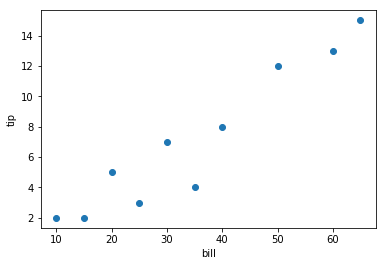

In [12]:
plt.scatter(tip_data.bill, tip_data.tip)
plt.ylabel('tip')
plt.xlabel('bill')
plt.show()

In [13]:
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))

bill = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
tip = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]


## Step 3: Let's set up our TF Linear Regression

We'll set up the TF Linear Regression.

In [14]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01,
                 random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        ## build the model
        with self.g.as_default():
            ## set graph-level random-seed
            tf.set_random_seed(random_seed)
            
            self.build()
            ## create initializer
            self.init_op = tf.global_variables_initializer()
        
    def build(self):
        ## define placeholders for inputs
        self.X = tf.placeholder(dtype=tf.float32,
                                shape=(None, self.x_dim),
                                name='x_input')
        self.y = tf.placeholder(dtype=tf.float32,
                                shape=(None),
                                name='y_input')
        print(self.X)
        print(self.y)
        ## define weight matrix and bias vector
        self.w = tf.Variable(tf.zeros(shape=(1)),
                        name='weight')
        self.b = tf.Variable(tf.zeros(shape=(1)), 
                        name="bias")
        print(self.w)
        print(self.b)

        self.z_net = tf.squeeze(self.w*self.X + self.b,
                                name='z_net')
        print(self.z_net)
        
        sqr_errors = tf.square(self.y - self.z_net, 
                               name='sqr_errors')
        print(sqr_errors)
        self.mean_cost = tf.reduce_mean(sqr_errors,
                                        name='mean_cost')
        
        optimizer = tf.train.GradientDescentOptimizer(
                    learning_rate=self.learning_rate, 
                    name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)
        
# Add summaries for Tensorboard
        tf.summary.histogram("weight",self.w) 
        tf.summary.histogram("error", sqr_errors)
        self.merge =tf.summary.merge_all()

In [15]:
### TODO: instantiate model with learning rate = 0.0001

In [16]:
lrmodel = TfLinreg(x_dim=1, learning_rate=???) # TODO: Fill in learning rate

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


## Step 4: Do the Training

In [17]:
#tf.reset_default_graph() # for tensorboard

def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    sess.run(model.init_op)
    
    ## Don't forget to clear destination path before
    writer = tf.summary.FileWriter(logs_path, sess.graph) # writing data on disk for tensorboard
    training_costs = []
    for i in range(num_epochs):
        _, cost, summary  = sess.run([model.optimizer, model.mean_cost, model.merge], 
                           feed_dict={model.X:X_train, 
                                      model.y:y_train})
        training_costs.append(cost)
        
        writer.add_summary(summary, i )

        try:
              import google.colab
              IN_COLAB = True
        except:
              IN_COLAB = False
        if IN_COLAB == True:
            summary_writer = tbc.get_writer()
            summary_writer.add_graph(sess.graph)# saving data on google colab
        #writer.add_summary(cost, epoch * total_batch + i)
        
        
    return training_costs

In [18]:

sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, x.reshape(10,1),y)

## Step 5: Look at the Loss Curve

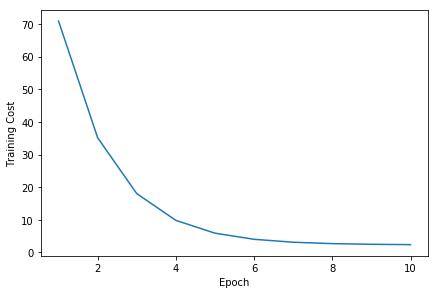

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
#plt.savefig('images/13_01.png', dpi=300)
plt.show()

## Step 6: Look at the result of the plot

In [11]:
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, 
                      feed_dict={model.X:X_test})
    return y_pred

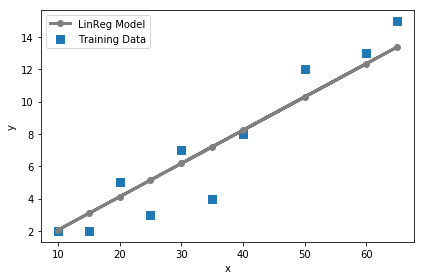

In [12]:
plt.scatter(x, y,
            marker='s', s=50,
            label='Training Data')
plt.plot(x, 
         predict_linreg(sess, lrmodel, x.reshape(10,1)),
         color='gray', marker='o', 
         markersize=6, linewidth=3,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### Step 6: Get Weight and Bias Variables for future reference

Let's save the weight and bias variables because we will need htem.

In [13]:
def get_weight_bias(sess, model):
    return sess.run((model.w[0], model.b[0]))
    
weight,bias = get_weight_bias(sess,lrmodel)

## Step 7: Plot the fit line (abline)

**=>TODO: Do a scatterplot of bill versus tip **

In [14]:
# Create a list of values in the best fit line
# TODO: Fill in gradient and intercept in formula
abline_values = [??? * i + ??? for i in tip_data.bill]

# Plot the best fit line over the actual values
plt.scatter(tip_data.bill, tip_data.tip)
plt.plot(tip_data.bill, abline_values, 'b')
plt.ylabel('tip')
plt.xlabel('bill')
plt.title("Fit Line")
plt.show()

SyntaxError: invalid syntax (<ipython-input-14-47ae5ae4bb99>, line 3)

In [15]:
# Make a prediction using the slope and the intercept
y_pred = tip_data.bill.values.reshape(10,1)
y_test = tip_data.tip.values.reshape(10,1)




## Step 8: Use the predict() function to plot abline


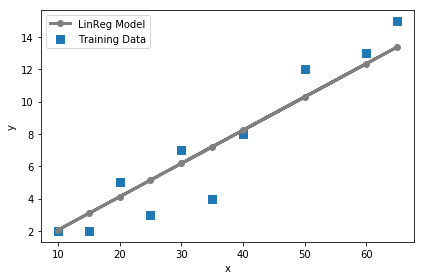

In [16]:
plt.scatter(x, y,
            marker='s', s=50,
            label='Training Data')
plt.plot(x, 
         predict_linreg(sess, lrmodel, x.reshape(10,1)),
         color='gray', marker='o', 
         markersize=6, linewidth=3,
         label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

## Step 9: Plot the residuals

Residuals are the error, or difference between the model predicted and model actual.  We'd like these to be as small as possible, with residuals roughly balanced.   We don't want a model that consistently predicts values too high or too low.

**=>TODO: do a plot of the bill (x-value) versus residuals (y-value) **

In [17]:
resid = (??? * tip_data.bill + ???) - tip_data.tip

SyntaxError: invalid syntax (<ipython-input-17-e8672d479a54>, line 1)

In [0]:
plt.scatter(tip_data.bill, resid)
plt.axhline(y=0, color='r', linestyle='-')  # horizon
plt.ylabel('Residuals')
plt.xlabel('bill')
plt.title("Residuals")
plt.show()




## Step 10 : Identify Coefficients

### Intercept and Slope
We can see them from output

Coefficients:
            Estimate 
(Intercept) -0.8217112049846651
bill        0.226334605857

- **Slope** (of line) : ** 0.226334605857**
- **Intercept** (where line meets Y-axis) : **-0.8217112049846651**  (below zero line)

We can also get these programatically.  
If `tip = a * amount + b`

In [0]:

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(weight))
print("Intercept: %s" % str(bias))

a = weight
b = bias


**==>  Question : Does bill amount influence tip amount? (are they strongly linked?) **


**==>  Question : How would you find this out?) **





### TODO: Calcluate Tip for 100 bill.

In [0]:
tip_for_100 = ??? * 100 + ??? 
print(tip_for_100)


## Step 12: Add a estimated_tip column to pandas dataframe

**=>TODO: create a new pandas column called est_tip **

In [0]:
tip_data['est_tip'] =  ???
tip_data

## Step 13: Perform a prediction


Let's try to run a prediction on some data: $45.00, $55.00, and $65.00 


**=>TODO: use predict function from above **

In [0]:
test_data_pd = pd.DataFrame({'bill' : [45., 55., 65.,]
             })

test_data_pd['predicted_tip'] = ??? # What do we do to do a prediction??



test_data_pd

### Now we run the TensorBaord

#### Local:

Now run the following command on a bash

```bash
$ tensorboard --logdir=/tmp/tensorflow_logs
```
Then open the browser(Chrome) and insert this address

```bash
localhost:6006
```

#### Google colab

Click on the link you had got at the first step

![](../images/tb_colab.png)